## DSCI Group Project (Group 89: Ava Alexander, Fangzhou Ye, Maya Seethram)

#### Predictive Question: Can we predict whether or not a class has completed a test preparation course based on their test results?


### INTRODUCTION

Are high marks in school a result of hardwork and effort, or simply a result of high natural intelligence? There always seem to be students who achieve high grades without having studied all semester. We want to explore whether success in exams can be achieved by natural intelligence alone, or whether hard work and studying is necessary to succeed. Barbarick and Ippolito (2003) found that, on average, we see higher predicted exam scores in students that spend more time studying rather than the students who spend less time. Further, there may be a difference between the need for natural intelligence versus time spent studying dependent on the course subject (Masui et al., 2014). 


We would like to try to predict the following question: Can we use the academic test scores of varying school subjects available to us to predict whether a student has completed a test preparation course prior to their test?


We will be using a dataset of student exam scores at public schools. The dataset provides data for whether or not the student completed a test preparation course prior to the test, as well as their math, reading, and writing scores from the test. We will use this data to explore the relation between exam scores and preparation taken. 


### METHODS

Overall: we must do the following:

1. Load in our data from the web
2. Tidy and wrangle our data
3. Summarize our data to include only the relevant information
4. Visualize our data in multiple ways
5. Analyze our data (build our classifier)
6. Interpret our analysis by creating a visualization

Each step is explored in depth below.

#### 1.0
First, we loaded the tidyverse and tidymodels packages 

In [1]:
library(tidyverse)
library(tidymodels)
library(gridExtra)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

#### 1.1
We loaded our dataset "exams" as a .csv file from the original web source.  We used the read_csv function and saved it to the object exam_data

In [2]:
exam_data <- read_csv("https://raw.githubusercontent.com/mayas02/dsci-100-2022w1-group-89/main/exams.csv")
head(exam_data)

Rows: 1000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): gender, race/ethnicity, parental level of education, lunch, test pr...
dbl (3): math score, reading score, writing score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
male,group A,high school,standard,completed,67,67,63
female,group D,some high school,free/reduced,none,40,59,55
male,group E,some college,free/reduced,none,59,60,50
male,group B,high school,standard,none,77,78,68
male,group E,associate's degree,standard,completed,78,73,68
female,group D,high school,standard,none,63,77,76


#### 2.0
We began tidying our data by replacing the spaces in the column names using the make.names function so that we can use the tidyverse functions.

In [12]:
#Change the col name
colnames(exam_data) <- make.names(colnames(exam_data))
head(exam_data)

gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
male,group A,high school,standard,completed,67,67,63
female,group D,some high school,free/reduced,none,40,59,55
male,group E,some college,free/reduced,none,59,60,50
male,group B,high school,standard,none,77,78,68
male,group E,associate's degree,standard,completed,78,73,68
female,group D,high school,standard,none,63,77,76


#### 3.0

We mutated the exam data and selected for the columns we will use.  We decided to exclude other non-numeric variables and only focus on numeric variables to classify possible students as either completed or not completed their test preparation based on their three exam grades.  

We chose to focus on the following three numeric variables: "reading score", "writing score", "math score".  We wanted to investigate if exam success in one subject was correlated with success in another subject, and we wanted to see if completing the test preparation course impacts student's exam outcomes.

Therefore, we decided to use these three numerical variables to predict the categorical variable of "test preparation course".  This allows us to predict whether or not a student completed their test preparation based on whether their test scores.

After deciding this, we mutated the data so that the "test.preparation.course" contained factors instead of character variable types.  Having a "completed" status in the test preparation course column now corresponds to the number 1, while an "none" status corresponds to 0.

In [15]:
#Make the test.preparation.course 0 and 1 then as factor
exam <- exam_data |>
mutate(test.preparation.course = ifelse(test.preparation.course == "completed", 1, 0)) |>
mutate(test.preparation.course = as_factor(test.preparation.course)) |>
select(test.preparation.course, math.score, reading.score, writing.score)
head(exam)


test.preparation.course,math.score,reading.score,writing.score
<fct>,<dbl>,<dbl>,<dbl>
1,67,67,63
0,40,59,55
0,59,60,50
0,77,78,68
1,78,73,68
0,63,77,76


#### 4.0
We found the mean and median and standard deviation of each  variable  (math score, writing score, and reading score) to better understand the variation between the three variables.  We observed that all three test scores were within the same range of each other, and had similar standard deviations, therefore we do not need to further transform these variables before we compare them (i.e., they are in the same units and of the same magnitude).  

In [14]:
exam_summary <- exam |>
  summarize(math_mean = mean(math.score), reading_mean = mean(reading.score), writing_mean = mean(writing.score),math_med = median(math.score),
            reading_med = median(reading.score), writing_med = median(writing.score),
            math_sd = sd(math.score), reading_sd = sd(reading.score), writing_sd = sd(writing.score))
exam_summary

math_mean,reading_mean,writing_mean,math_med,reading_med,writing_med,math_sd,reading_sd,writing_sd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
66.396,69.002,67.738,66.5,70,68,15.40287,14.73727,15.60099


#### 4.1
We then generated 3 box plots as a way to visualize students’ ranges of scores in each of the three exam subjects.  We initially observed from the box plots that on average, students that completed their test preparation, had higher scores.  This pattern was strongest for the writing exams.

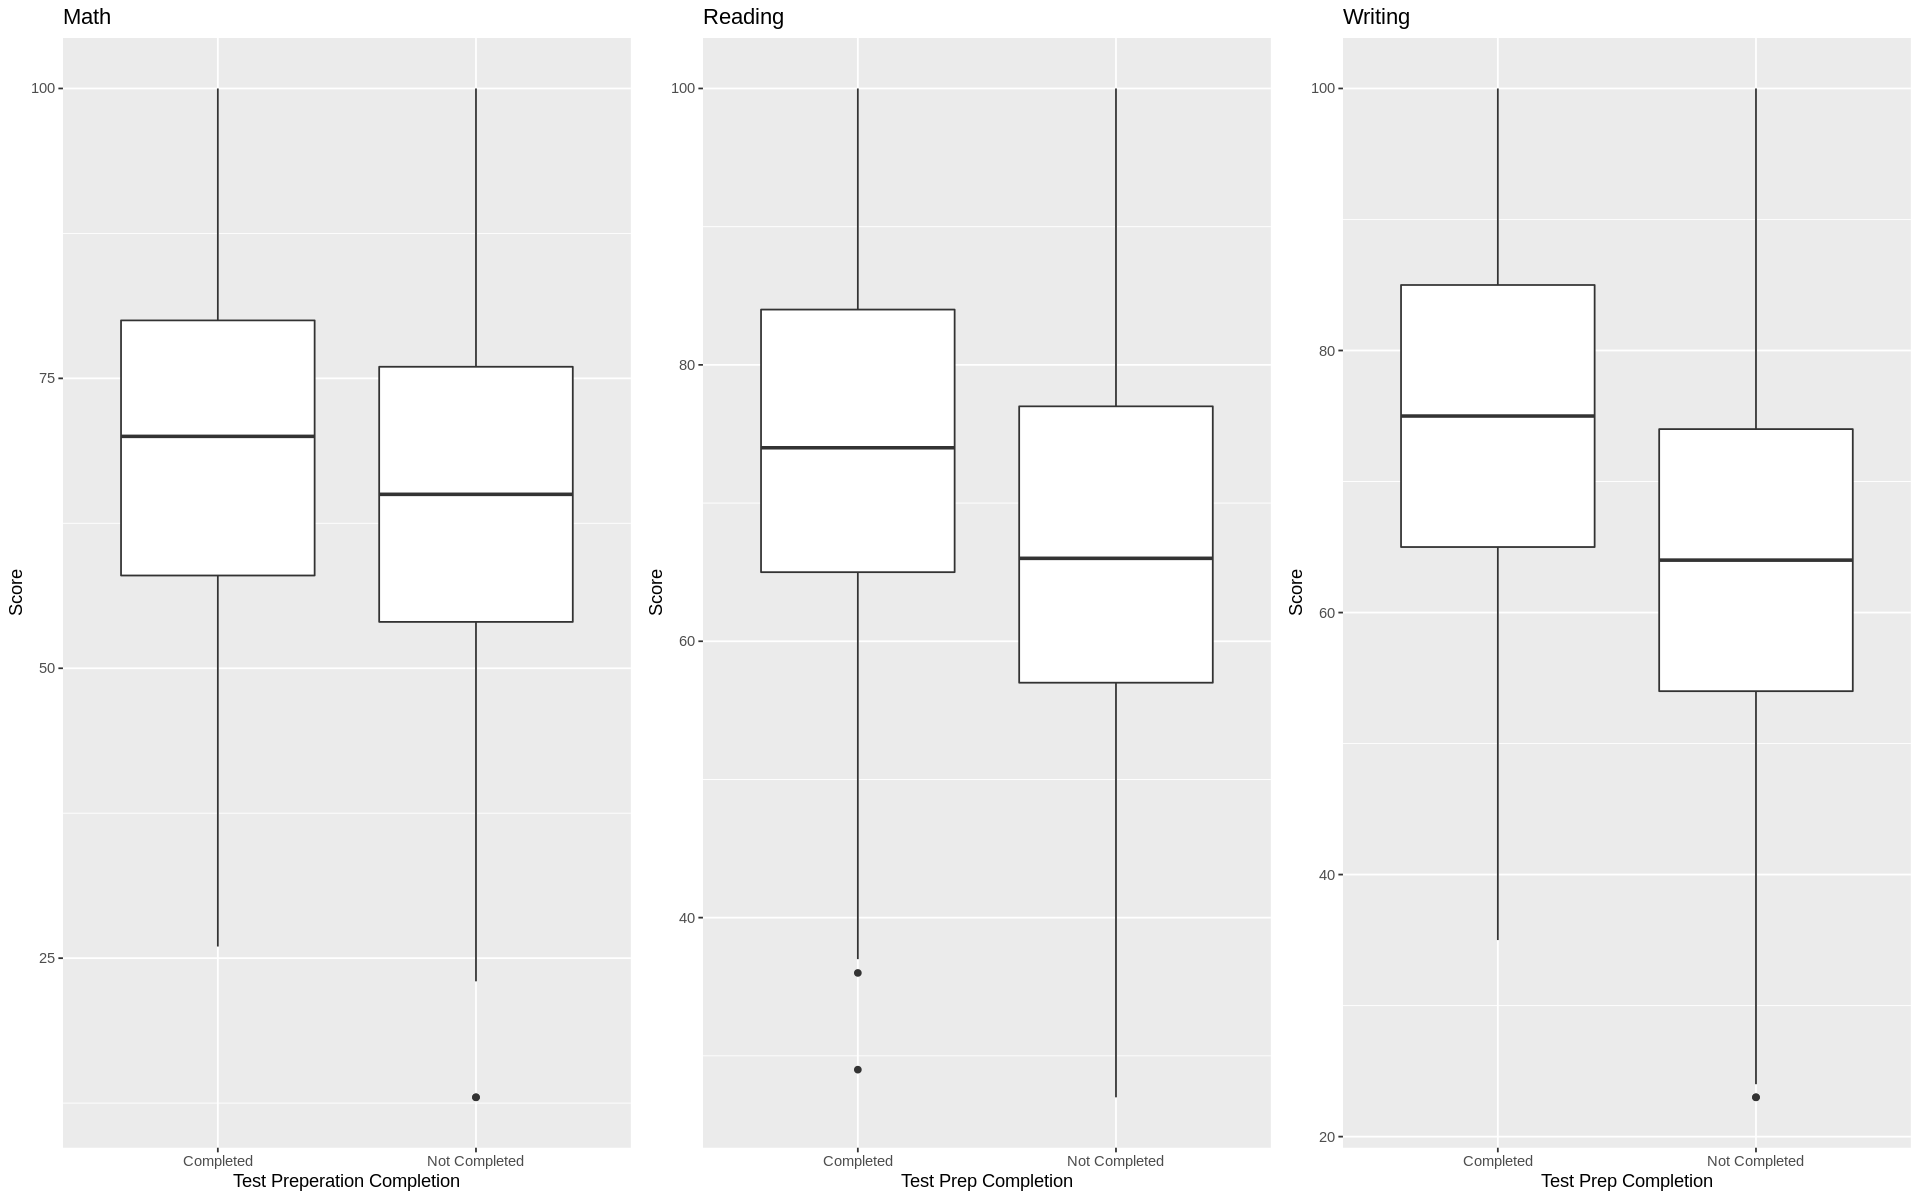

In [8]:
# Show box plot
options(repr.plot.width = 16, repr.plot.height = 10)
exam1 <- exam %>%
    mutate(test.preparation.course = ifelse(test.preparation.course == 1, "Completed", "Not Completed"))

bp1 <-ggplot(exam1,aes(x=test.preparation.course,y=math.score)) +
        geom_boxplot() +
        labs(x='Test Preperation Completion',y='Score') +
        ggtitle('Math')
bp2 <-ggplot(exam1,aes(x=test.preparation.course,y=reading.score)) +
        geom_boxplot() +
        labs(x='Test Prep Completion',y='Score') +
        ggtitle('Reading')
bp3 <-ggplot(exam1,aes(x=test.preparation.course,y=writing.score)) +
        geom_boxplot() +
        labs(x='Test Prep Completion',y='Score')+
        ggtitle('Writing')


plot_grid(bp1,bp2,bp3,ncol = 3)


#### i think this should be 5.0 and we should move it below scatter plot

Then, the data was split into two subsections: training (exam_training, contains 75% of the data)) and testing (exam testing, contains 25% of the data).  To build our classifier, we will train it only on the exam_training data.  The exam_testing data will be kept "secret" from our classifier, so that we can use it in the future.  

We also used group_by and summarize functions to count the number of each observation in each group, and what percent of each observation makes up our training set.  We found that there are 251 instances of students who completed the prep course (66.5%), and 498 instances of students who didn't (33.5%).  We want to make sure that these two classes are balanced (that the proportion of each class the same in the training and the testing set - that the two classes are evenly represented).

In [16]:
#Start train data
set.seed(2022)
exam_split <- initial_split(exam, prop = 0.75, strata = test.preparation.course)
exam_training <- training(exam_split)
exam_testing <- testing(exam_split)

exam_proportions <- exam_training |>
                      group_by(test.preparation.course) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(exam_training))
exam_proportions


test.preparation.course,n,percent
<fct>,<int>,<dbl>
0,498,66.48865
1,251,33.51135


## i think this should be 4.3 and we should move it above the splitting
We then generated 3 scatter plots to visualize the correlation between each of three variables (instead of generating a plot in 3-dimensions).  These scatter plots showed that all three variables are strongly, positively correlated with each other (i.e. if you do well on math or reading, you are likely to get a good score on the writing exam as well).  Reading and writing scores were the most tightly correlated out of the 3 scatter plots.   Additionally, by coloring the points by test preparation status (completed or not completed), we were able to observe a general pattern: students who completed their test preparation received better scores on all sections (math reading, writing) of their examinations.


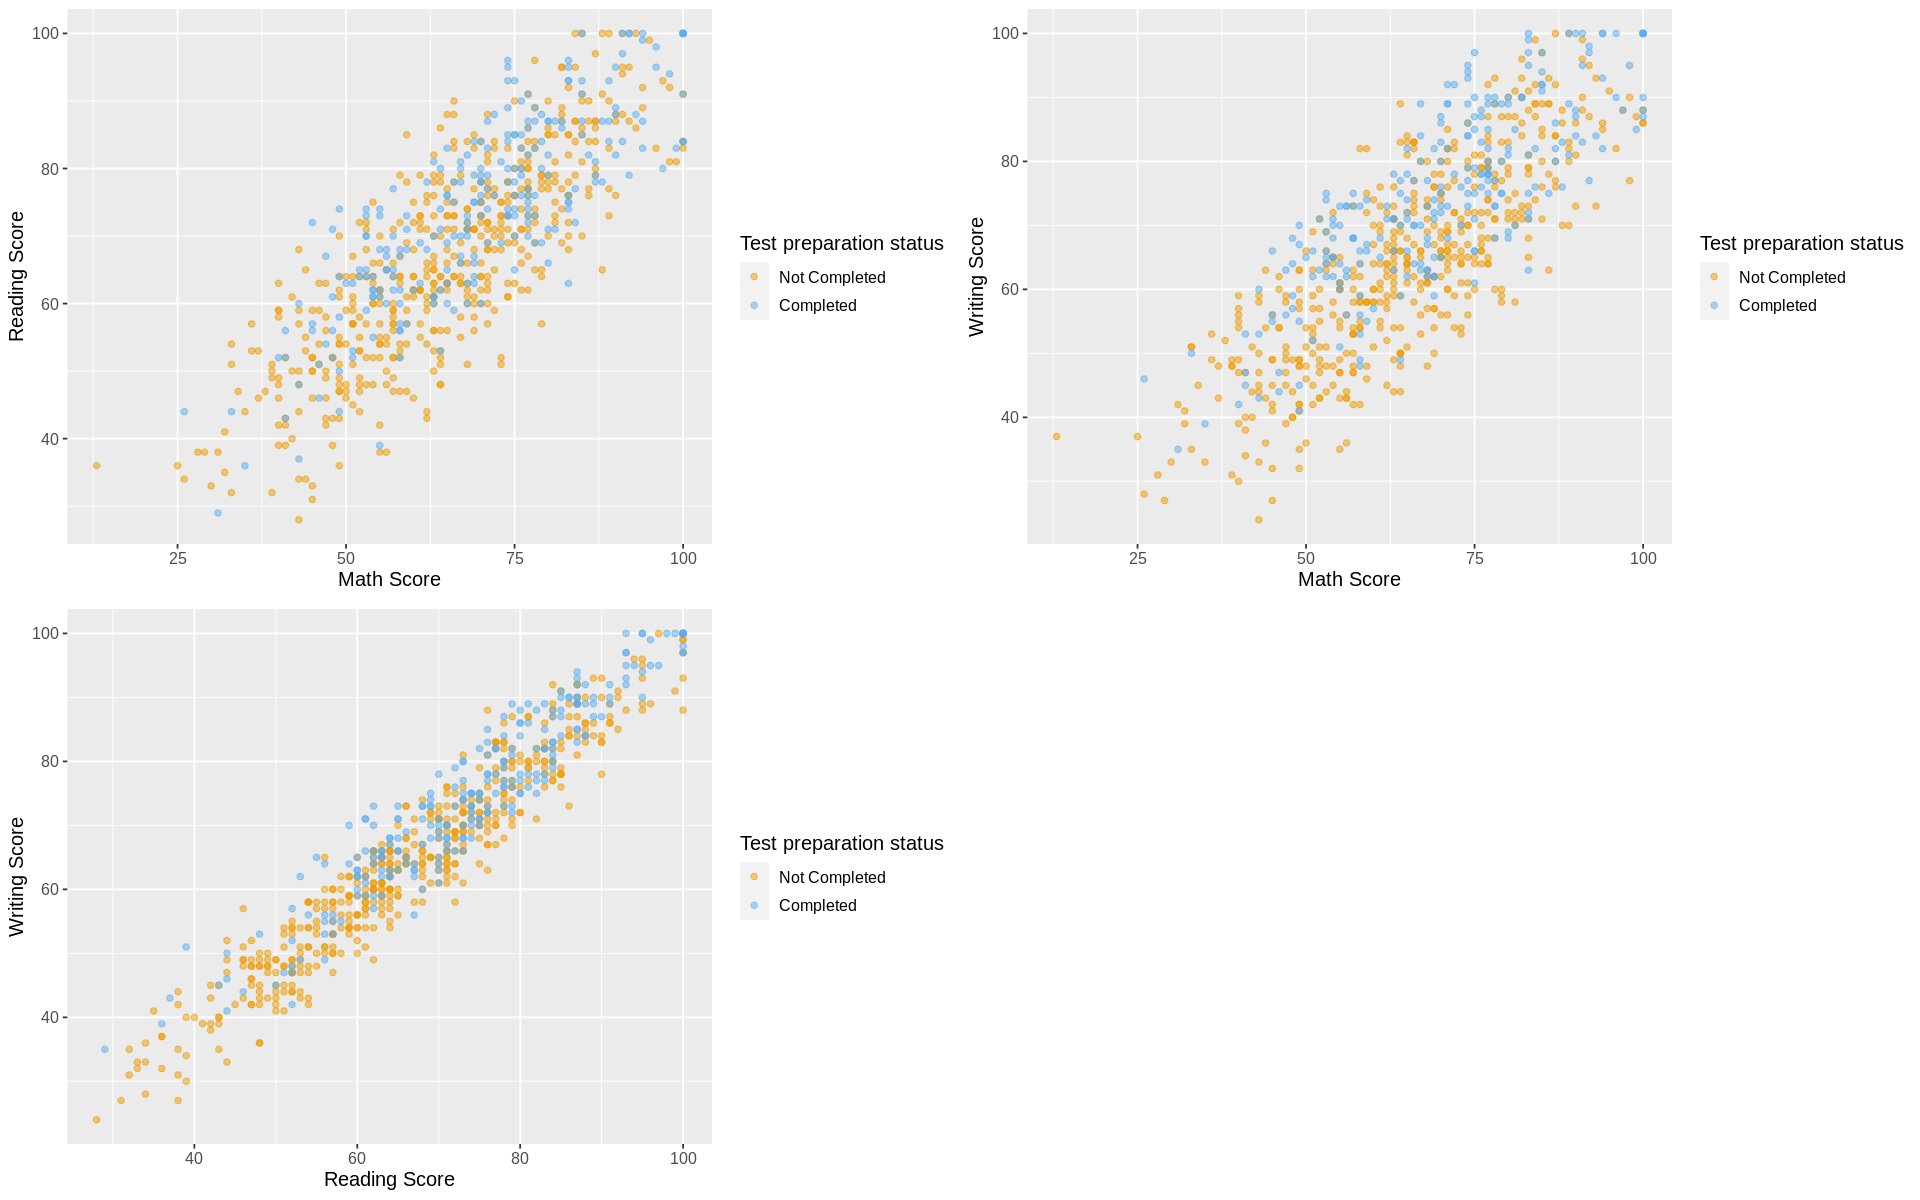

In [17]:
options(repr.plot.width = 16, repr.plot.height = 10)
exam_plot1 <- exam_training |>
  ggplot(aes(x = math.score, y = reading.score, color = test.preparation.course)) +
  geom_point(alpha = 0.5) +
  labs(x = "Math Score", 
       y = "Reading Score",
       color = "Test preparation status") +
scale_color_manual(labels = c("Not Completed", "Completed"), 
                     values = c("orange2", "steelblue2")) + 

  theme(text = element_text(size = 12))


exam_plot2 <- exam_training |>
  ggplot(aes(x = math.score, y = writing.score, color = test.preparation.course)) +
  geom_point(alpha = 0.5) +
  labs(x = "Math Score", 
       y = "Writing Score",
       color = "Test preparation status") +
scale_color_manual(labels = c("Not Completed", "Completed"), 
                     values = c("orange2", "steelblue2")) + 
  theme(text = element_text(size = 12))



exam_plot3 <- exam_training |>
  ggplot(aes(x = reading.score, y = writing.score, color = test.preparation.course)) +
  geom_point(alpha = 0.5) +
  labs(x = "Reading Score", 
       y = "Writing Score",
       color = "Test preparation status") +
scale_color_manual(labels = c("Not Completed", "Completed"), 
                     values = c("orange2", "steelblue2")) + 
  theme(text = element_text(size = 12))

exam_plots <- plot_grid(exam_plot1, exam_plot2, exam_plot3)
exam_plots



#### 5.1
Next, we had to choose our K value (how many neighboring points we will use to classify a new observation).  We used cross validation to choose a K that gives us the best classifier performance.  Specifically, this involved splitting our data into 10 evenly sized chunks (v=10), therefore runing cross-validation on 10 train/validation splits (10 was chosen to decrease standard error).  Then, we created a recipe to pre-process the data (exam_recipe), and we then made a model specification. 

To choose the optimal K value, we plotted the accuracy versus K (or "Neighbors"), and observed that a K of ______ gave us the highest accuracy.  

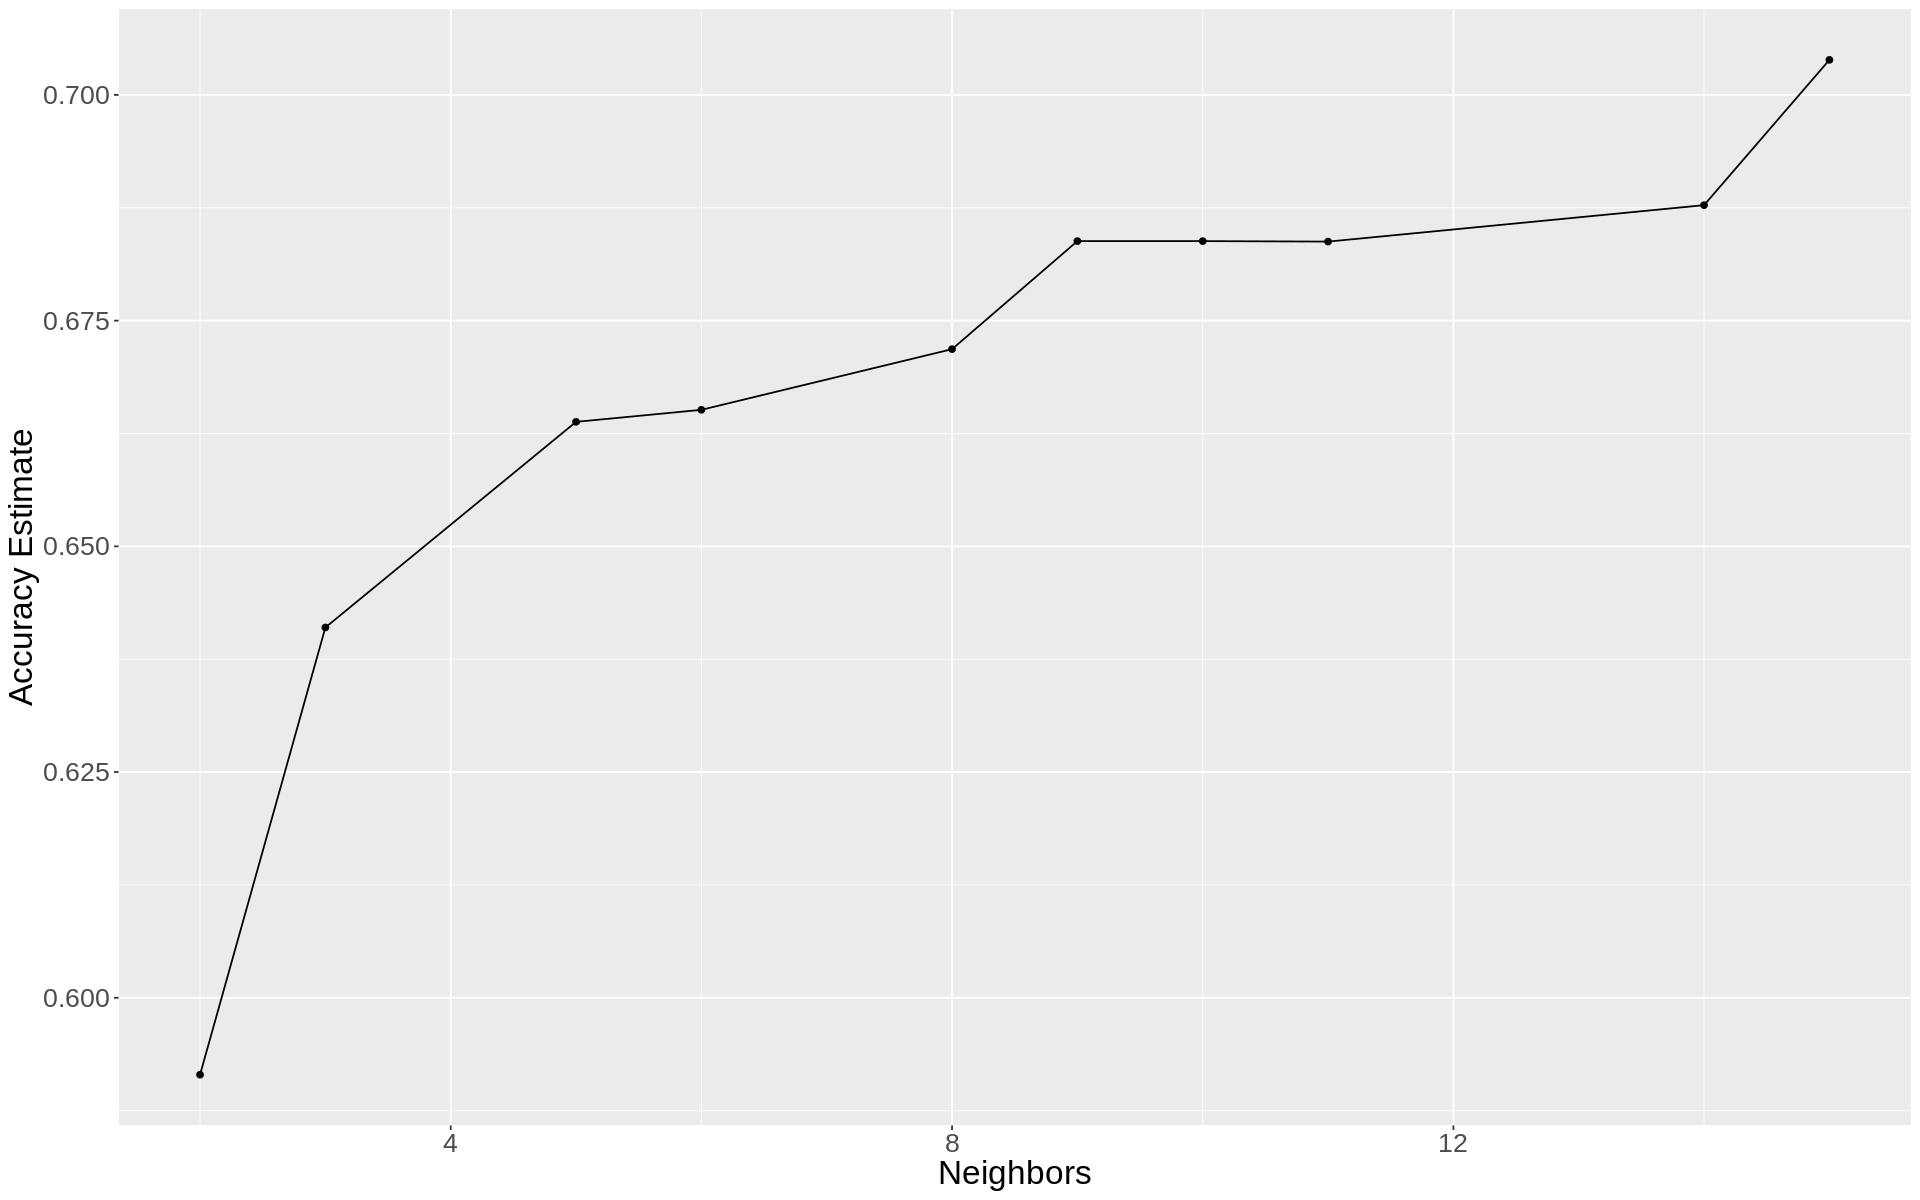

In [9]:
set.seed(2022)

exam_vfold <- vfold_cv(exam_training, v = 10, strata = test.preparation.course)

exam_recipe <- recipe(test.preparation.course ~ math.score + reading.score + writing.score, data = exam_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())
  
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_results <- workflow() |>
  add_recipe(exam_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = exam_vfold, grid = 10) |>
  collect_metrics() |>
  filter(.metric == "accuracy")

# Plot k values against their respective accuracies and choose optimal k value
cross_val_plot <- knn_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 20))
cross_val_plot



In [4]:
set.seed(2022)

knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) |>
  set_engine("kknn") |>
  set_mode("classification")

exam_fit <- workflow() |>
  add_recipe(exam_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = exam_training) 

exam_predictions <- predict(exam_fit, exam_testing) |> 
    bind_cols(exam_testing)

exam_acc <- exam_predictions |> 
    metrics(truth = test.preparation.course, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)
exam_acc

exam_cm <- exam_predictions |> 
    conf_mat(truth = test.preparation.course, estimate = .pred_class)

exam_cm


ERROR: Error in is_recipe(recipe): object 'exam_recipe' not found


### EXPECTED OUTCOMES AND SIGNIFICANCE

We expect to find that the ability does exist to predict whether or not a student has prepared for the test preparation course by their test results. The score that a student receives is a direct indication of whether or not they have prepared well by completing the test preparation course or not. We expect to find that if a student has completed the course, they have a high test score, but if they have not then their test score is more likely to be low.


These findings could show the importance of proper preparation for exams, and the impact that test preparation can have on test scores.


This could lead to future questions regarding the need for preparation prior to exams. An example could be: Can we predict how many hours a student has studied by their test results? Another stream of questioning could be: How many hours of preparation does it take to make a significant increase in an individual’s test scores?
